# Second Exam
## Jorge Alberto Padilla Gutierrez

In [354]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Data Set')

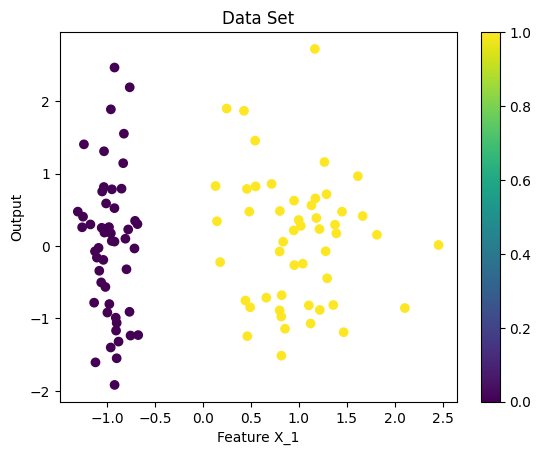

In [235]:
X, y = make_classification(n_classes=2, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()
plt.xlabel('Feature X_1')
plt.ylabel('Output')
plt.title('Data Set')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80, 2)
(80,)
(20, 2)
(20,)


# Hinge Function
$
l(y) = max(0,1-yf(x))
$

In [349]:
class SVM:
    # Hyperparametrers
    def __init__(self, lr = 0.01, epochs = 100, treshold = .5, C = 1.0):
        self.lr = lr
        self.epochs = epochs
        self.treshold = treshold
        self.C = C
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        # Matrix dimentions
        # m = rows
        # n = columns
        m, n = X.shape

        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        # We need to reshape y to be a column vector
        y = y.reshape(m, 1)

        losses = list()
        b_list = list()
        w_list = list()

        # Gradient Descent
        for epoch in range(self.epochs):
            # Calculate Prediction
            y_hat = self.linear(X)

            # Get loss - L - J
            loss = self.cost(y, y_hat)          # Mean Square Error
            losses.append(loss)
            
            # Calculate gradient
            dw = (1/m) * (self.weights - (self.C * np.dot(X.T, self.grad(y,y_hat))))
            db = (1/m) * (self.bias - (self.C * np.sum(self.grad(y,y_hat))))
            
            # upgrade parames
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            w_list.append(self.weights)
            b_list.append(self.bias)

            print(f"epoch: {epoch}, loss: {loss}, w: {self.weights}, b: {self.bias}")

        return self.weights, self.bias, losses, w_list, b_list
    
    def linear(self, X):
        return np.dot(X, self.weights) + self.bias

    def sigmoid(self, X):
        return 1 / ( 1 + np.exp(-(self.linear(X))) )
    
    def predict(self, X):
        return (self.sigmoid(X) >= self.treshold).astype(int)
    
    def predict_weights(self, X):
        return self.sigmoid(X)
    
    def hinge(self, y, y_hat):
        l = 1 - y * y_hat
        l[l < 0] = 0
        return l
    
    def grad(self, y, y_hat):
        l = 1 - y * y_hat
        for i in range(len(y)):
            if l[i] < 0:
                l[i] = 0
            else:
                l[i] = y[i]
        # l[l < 0] = 0
        # l[l > 0] = y
        return l
    
    def cost(self, y, y_hat):
        return (np.sum(self.weights**2))/2 + self.C * np.mean(self.hinge(y, y_hat))
    
    def accuracy(self, y, y_hat):
        return np.mean(not(np.bitwise_xor(y, y_hat)))

In [350]:
np.random.seed(42)
model = SVM(lr=0.001,epochs=5000,treshold=0.8,C=1.0)
w, b, losses, w_list, b_list = model.fit(X_train, y_train)

epoch: 0, loss: 1.1582838797786505, w: [[0.37473578]
 [0.95054013]], b: [0.73219729]
epoch: 1, loss: 1.158080920380461, w: [[0.37493143]
 [0.95036595]], b: [0.73240064]
epoch: 2, loss: 1.1578780321384152, w: [[0.37512708]
 [0.95019177]], b: [0.73260398]
epoch: 3, loss: 1.1576752150499083, w: [[0.37532273]
 [0.9500176 ]], b: [0.73280733]
epoch: 4, loss: 1.1574724691123355, w: [[0.37551838]
 [0.94984342]], b: [0.73301067]
epoch: 5, loss: 1.1572697943230918, w: [[0.37571402]
 [0.94966925]], b: [0.733214]
epoch: 6, loss: 1.157067190679573, w: [[0.37590966]
 [0.94949508]], b: [0.73341734]
epoch: 7, loss: 1.1568646581791744, w: [[0.3761053 ]
 [0.94932092]], b: [0.73362067]
epoch: 8, loss: 1.156662196819291, w: [[0.37630094]
 [0.94914675]], b: [0.733824]
epoch: 9, loss: 1.1564598065973188, w: [[0.37649657]
 [0.94897259]], b: [0.73402733]
epoch: 10, loss: 1.1562574875106533, w: [[0.3766922 ]
 [0.94879843]], b: [0.73423065]
epoch: 11, loss: 1.1560552395566899, w: [[0.37688783]
 [0.94862428]], b

# Results

Text(0, 0.5, 'loss')

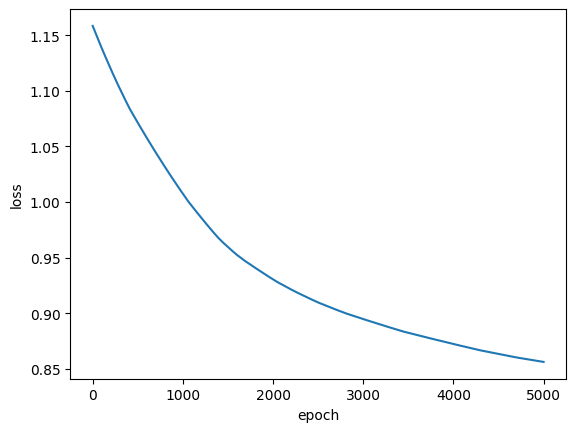

In [352]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel('epoch')
plt.ylabel('loss')

In [355]:
print(y_test)
print(np.array(model.predict(X_test)).reshape(-1).astype(int))
print(accuracy_score(y_test, np.array(model.predict(X_test)).reshape(-1).astype(int)))

[0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1]
[0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0]
0.9


# Accuracy
0.9

Este modelo difiere con la regresion logistica desde el objetivo, el cual es formar un superplano que divida cada categoria, mientras que la regresion logictica solo se vasa en una ecuacion sigmoidal, sirve para sets de datos con muchas dimensiones y sigue siendo efectivo cuando estas pasan la cantidad de samples

Como error se basa en hinge, el cual es el maximo entre 0 y 1 - (y*y'), tambien es diferente ya que logistica sigue siendo completamente basada en sigmoidal